# TOPIC

Some intro text

## 001. SEABORN

In [1]:
import sys
from pathlib import Path

current_dir = Path().resolve()
while current_dir != current_dir.parent and current_dir.name != "katas":
    current_dir = current_dir.parent
if current_dir != current_dir.parent:
    sys.path.append(current_dir.as_posix())

In [178]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from lib.utils import fresh_df
from IPython.core.interactiveshell import InteractiveShell

pd.set_option('display.max_rows', None)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### 001.001 Linear plot

1. This


,1,2,3,4,5,6
name,,,,,,
PANDAS 001,2023-01-06 08:00|00:22,2023-01-08 13:11|00:22,2023-01-12 00:52|00:31,2023-01-17 23:55 |00:23,NaN,NaN
PANDAS 002,2023-01-06 13:08|00:12,2023-01-07 23:05|00:19,2023-01-10 21:45|00:10,2023-01-12 20:16|00:22,2023-01-16 23:29 |00:10,2023-01-21 14:10 |00:26
PANDAS 003,2023-01-13 23:41|00:06,2023-01-18 22:02 |00:05,NaN,NaN,NaN,NaN
PANDAS 004,2023-01-20 22:41|00:23,NaN,NaN,NaN,NaN,NaN


1

,PANDAS 001,PANDAS 002,PANDAS 003,PANDAS 004
Time,,,,
2023-01-06 08:00,22.0,NaN,NaN,NaN
2023-01-06 13:08,NaN,12.0,NaN,NaN
2023-01-07 23:05,NaN,19.0,NaN,NaN
2023-01-08 13:11,22.0,NaN,NaN,NaN
2023-01-10 21:45,NaN,10.0,NaN,NaN
2023-01-12 00:52,31.0,NaN,NaN,NaN
2023-01-12 20:16,NaN,22.0,NaN,NaN
2023-01-13 23:41,NaN,NaN,6.0,NaN
2023-01-16 23:29,NaN,10.0,NaN,NaN


<AxesSubplot: xlabel='Time'>

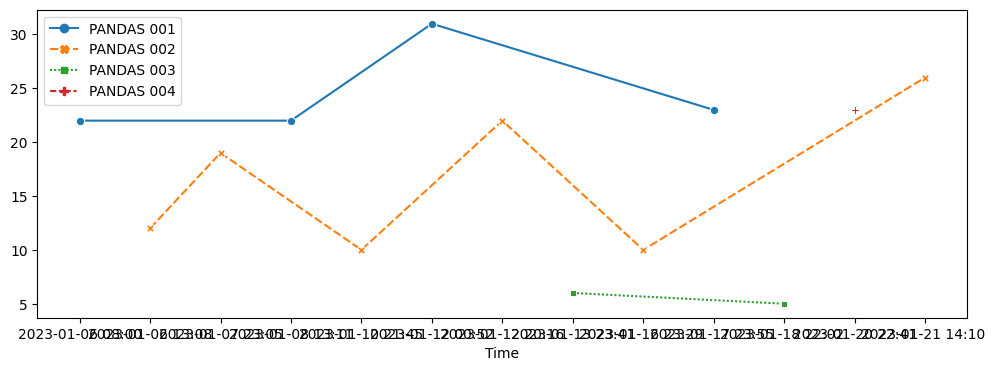

In [207]:
data_file = "katas.tsv"
# solution
df = fresh_df(data_file, sep="\t", index_col=0, header=None)
df.index = df.index.rename("name")
df.sort_index(inplace=True)
df

# df.apply(lambda x: [None, None] if x in [np.nan, ''] else x.str.split("|"))
df = df.apply(lambda x: x.replace(np.nan, 123) if x.eq('').any() or x.eq(np.nan).any() else x.str.split("|"))
1
# df[[1,2]] = df[1].apply(lambda x: pd.Series(x.split("|") if x else [None, None]))
# df
katas_df = pd.DataFrame()
katas_df.index.name = "Time"
for name, row in df.iterrows():
    katas_df = katas_df.assign(**{name: None})
    new_df = row.apply(pd.Series).dropna()
    new_df.columns = ["Time", name]
    new_df[name] = pd.to_timedelta(new_df[name] + ":00")
    new_df[name] = new_df[name].dt.total_seconds()/60
    new_df.set_index("Time", inplace=True)
    katas_df = pd.concat([katas_df, new_df], axis=0)
katas_df.sort_index(inplace=True, ascending=True)
katas_df
plt.rcParams["figure.figsize"] = (12, 4)
sns.lineplot(data=katas_df, markers=True)
